In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from scipy.signal import freqz
from scipy.fft import fft, ifft

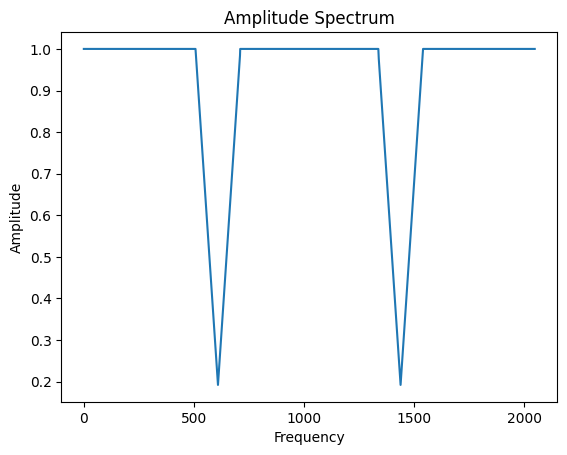

In [67]:
with open('Amplitude-Spectrum.dat', 'r') as f:
    data = f.readlines()
    data = [float(x) for x in data] # convert to float
    
# mirror the data to include full spectrum
data = data + data[::-1]
amplitude_spectrum = data

# plot the data
plt.plot(data)
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

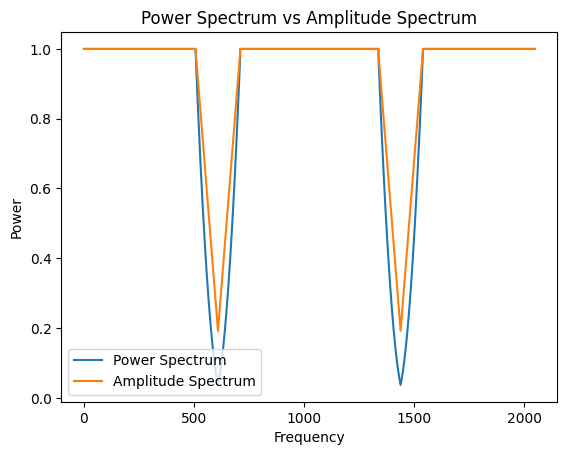

In [68]:
# get power spectrum
power_spectrum = np.abs(np.square(data))
plt.plot(power_spectrum)
plt.plot(data)
plt.title('Power Spectrum vs Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(['Power Spectrum', 'Amplitude Spectrum'])
plt.show()

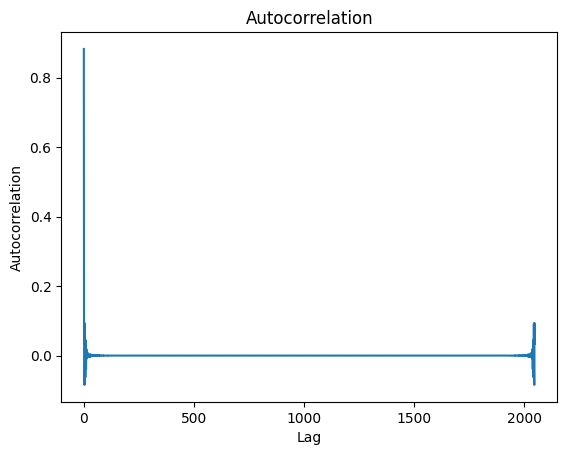

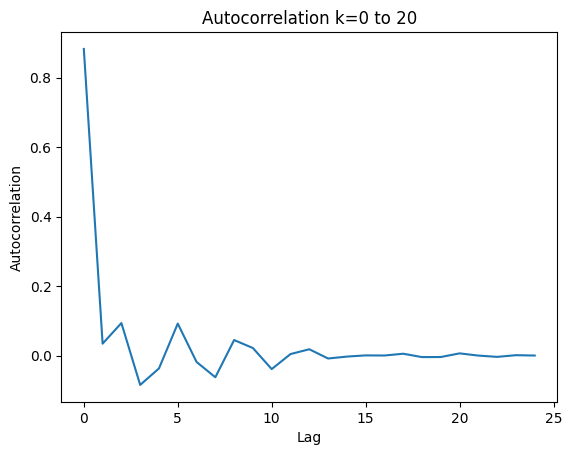

In [69]:
# get autocorrelation
autoCorr = ifft(power_spectrum)

# discard imaginary part (appear due to numerical errors)
autoCorr = np.real(autoCorr)

# plot autocorrelation
plt.plot(autoCorr)
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# zoom around 0 to better display time lags
plt.plot(autoCorr[:25])
plt.title('Autocorrelation k=0 to 20')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [88]:
p_list = [4, 8, 12, 16, 20, 24, 50] # model orders
filter_coefficients = [] # store filter coefficients

for p in p_list:
    R_temp = toeplitz(autoCorr[:p])
    r = R_temp[1:, 0] # get acf for all lags except 0
    R = R_temp[:p-1, :p-1] # get acf for all lags except p
    
    # solve for a
    a = np.linalg.solve(R, -r)
    a = np.insert(a, 0, 1) # add 1 to the beginning
    
    # normalize coefficients
    a = a/np.sum(a)
    filter_coefficients.append(a)


print(filter_coefficients[2])

[ 1.0760467  -0.06596706 -0.16949315  0.16630564  0.06873834 -0.19594265
  0.0473056   0.1463196  -0.11944484 -0.05596906  0.12285002 -0.02074912]


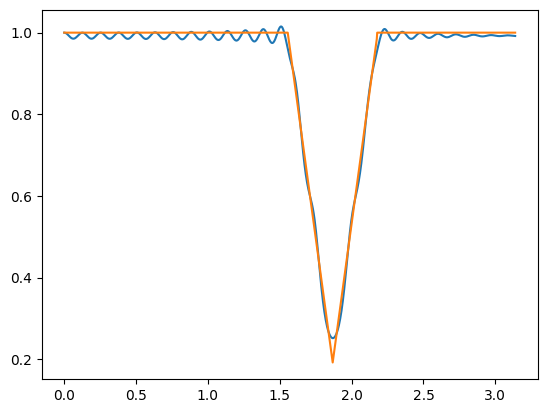

In [91]:
# plot frequency response against the amplitude spectrum
w, h = freqz(1, filter_coefficients[6], worN=1024)
plt.plot(w, np.abs(h))
plt.plot(w, amplitude_spectrum[0:1024])
# plt.title('Frequency Response vs Amplitude Spectrum')